# Covid 19 Data Analysis 

* **My Python version is 3.9.9** 

## Importing Required Packages

In [93]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Url request
import requests

#For model evaluation
from sklearn import metrics

#Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

#Double Exponential Smoothing and Holt Wint
from statsmodels.tsa.api import ExponentialSmoothing,Holt

#For 
from sklearn.model_selection import ParameterGrid

#Timer 
from timeit import default_timer as timer

## Evaluation Metrics 
* Mean Square Error
* Root Mean Square Error
* Mean Absolute Error
* Mean Absolute Percentage Error
* R Squared Score


In [94]:
def timseries_evaluation_metrics_func(y_true,y_pred):
    def mean_absolute_percentage_error(y_true,y_pred):
        y_true,y_pred = np.array(y_true),np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true))*100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true=y_true,y_pred=y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true=y_true,y_pred=y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true=y_true,y_pred=y_pred)}',end='\n\n')

## Getting Time Series Data 

In [95]:
data_doc = 'india_upto_data.csv'

## Data Preparation

In [96]:
covid_data = pd.read_csv(data_doc,parse_dates=True,index_col=['Day'])

In [97]:
covid_data.head(20)

,confirmed
Day,
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
2020-02-04,0.50000
2020-02-05,0.42857
2020-02-06,0.28571
2020-02-07,0.28571
2020-02-08,0.28571
2020-02-09,0.14286


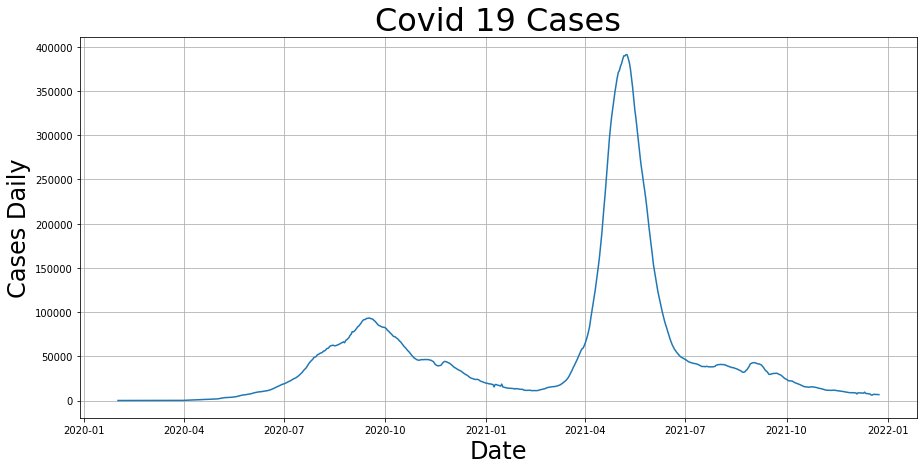

<Figure size 1080x504 with 0 Axes>

In [98]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_data["confirmed"])
plt.xlabel("Date",size=24)
plt.ylabel("Cases Daily",size=24)
plt.title("Covid 19 Cases",size=32)
plt.grid(True)
plt.show()
plt.savefig("Covid cases.png")

In [99]:
print(covid_data['confirmed'][covid_data['confirmed'] == 0].count())
covid_data['confirmed'][covid_data['confirmed'] == 0]

21


Day
2020-02-10    0.0
2020-02-11    0.0
2020-02-12    0.0
2020-02-13    0.0
2020-02-14    0.0
2020-02-15    0.0
2020-02-16    0.0
2020-02-17    0.0
2020-02-18    0.0
2020-02-19    0.0
2020-02-20    0.0
2020-02-21    0.0
2020-02-22    0.0
2020-02-23    0.0
2020-02-24    0.0
2020-02-25    0.0
2020-02-26    0.0
2020-02-27    0.0
2020-02-28    0.0
2020-02-29    0.0
2020-03-01    0.0
Name: confirmed, dtype: float64

In [100]:
covid_data.index.freq="D"

In [101]:
covid_data.isna().sum()

confirmed    0
dtype: int64

In [102]:
covid_data.dropna(inplace=True)

In [103]:
covid_data

,confirmed
Day,
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
2020-02-04,0.50000
2020-02-05,0.42857
...,...
2021-12-20,6931.42857
2021-12-21,6836.14286
2021-12-22,6767.71429


In [104]:
covid_data =covid_data.asfreq("D")
covid_data.index

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24'],
              dtype='datetime64[ns]', name='Day', length=693, freq='D')

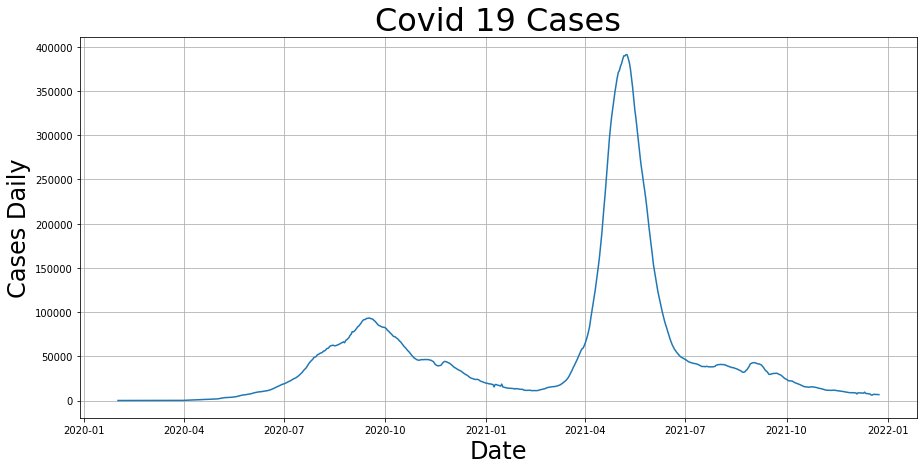

In [105]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_data["confirmed"])
plt.xlabel("Date",size=24)
plt.ylabel("Cases Daily",size=24)
plt.title("Covid 19 Cases",size=32)
plt.grid(True)
plt.show()


Removing the **Data upto 2020-03-01** as the number of cases doesnot have any significance on the rest of the data

In [106]:
covid_data[covid_data['confirmed'] == 0].count()

confirmed    21
dtype: int64

In [107]:
covid_data[:31]

,confirmed
Day,
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
2020-02-04,0.50000
2020-02-05,0.42857
2020-02-06,0.28571
2020-02-07,0.28571
2020-02-08,0.28571
2020-02-09,0.14286


## Train and Test Data
*  The **train** will have all the data expected for the **last 30 days**, and the **test** contains only the **last 30 days** to evaluate against **predictions.**

In [108]:
train = covid_data['confirmed'].iloc[30:-30].copy()
test = covid_data['confirmed'].iloc[-30:].copy()

In [109]:
train

Day
2020-03-02        0.28571
2020-03-03        0.28571
2020-03-04        3.57143
2020-03-05        3.85714
2020-03-06        4.00000
                 ...     
2021-11-20    10443.71429
2021-11-21    10195.00000
2021-11-22    10011.28571
2021-11-23     9880.71429
2021-11-24     9480.71429
Freq: D, Name: confirmed, Length: 633, dtype: float64

## Simple Exponential Smoothing

**Simple Exponential Smoothing** is used for time series prediction when the data particularly  does not follow any:

*  **Trend:** An upward or downward slope
*  **Seasonality:** Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.

**Simple Exponential Smoothing** works on weighted averages i.e. the average of the previous level and current observation. Largest weights are associated with the recent observations and the smallest weights are associated with the oldest observations.

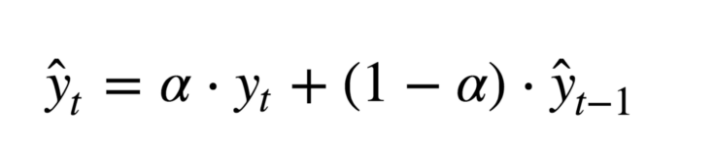

The decrease in weight is controlled by the smoothing parameter which is known as **𝜶(alpha)** here. **𝜶(alpha)** value can be **between 0 to 1**:

*  **𝜶(alpha)=0:** Means that forecast for future value is the average of  historical data.
*  **𝜶(alpha)=1:** Means that forecast for all future value is the value of the last observation    

From the above explanation of the **Simple Exponential Smoothing.**

**Hypothesis :** we assume that our data doesn't have any trend and seasonality

In [110]:
resu = []
temp_df = pd.DataFrame()
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(f'Fitting for smoothing level = {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v = fit_v.forecast(30)
    timseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test,fcst_pred_v))
    df3 = {'smoothing parameter':i,'RMSE':rmse}
    temp_df = temp_df.append(df3,ignore_index=True)


Fitting for smoothing level = 0
Evaluation metric results:-
MSE is : 2168452430.3090734
MAE is : 46556.70136656541
RMSE is : 46566.645040297604
MAPE is : 594.1170328380975
R2 is : -2340.771193538731

Fitting for smoothing level = 0.1
Evaluation metric results:-
MSE is : 11135593.043231333
MAE is : 3195.247231390759
RMSE is : 3337.003602519981
MAPE is : 42.23888424458073
R2 is : -11.025632034682275

Fitting for smoothing level = 0.2
Evaluation metric results:-
MSE is : 6402494.500472187
MAE is : 2340.1936515919283
RMSE is : 2530.315099048375
MAPE is : 31.356283649670203
R2 is : -5.914229234836805

Fitting for smoothing level = 0.3
Evaluation metric results:-
MSE is : 5143139.426790963
MAE is : 2053.5703672555123
RMSE is : 2267.849074958685
MAPE is : 27.708317255133196
R2 is : -4.554217185338816

Fitting for smoothing level = 0.4
Evaluation metric results:-
MSE is : 4497690.975922881
MAE is : 1889.8949183491284
RMSE is : 2120.776031532533
MAPE is : 25.625155942528753
R2 is : -3.857179718

Sorting based on the **RMSE values** of the models

In [111]:
temp_df.sort_values(by=['RMSE']).head(10)

,smoothing parameter,RMSE
10,1.0,1782.258497
9,0.9,1817.341063
8,0.8,1856.204908
7,0.7,1900.928077
6,0.6,1954.962589
5,0.5,2024.402862
4,0.4,2120.776032
3,0.3,2267.849075
2,0.2,2530.315099
1,0.1,3337.003603


Selecting **smoothing parameter** as **1.0** as it have the least **RMSE value**

In [112]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=1.0,optimized=True,use_brute=True)
fcst_ses_pred = fitSES.forecast(30)
timseries_evaluation_metrics_func(test,fcst_ses_pred)

Evaluation metric results:-
MSE is : 3176445.350742108
MAE is : 1500.1523846666664
RMSE is : 1782.2584971720876
MAPE is : 20.664750619259326
R2 is : -2.430330366600514



In [113]:
fcst_ses_pred_df = pd.DataFrame(fcst_ses_pred)
fcst_ses_pred_df["index"] = test.index
fcst_ses_pred_df.set_index("index",inplace=True)

### Summary of the Best Simple Exponential Smoothing Model

In [114]:
fitSES.summary()

Dep. Variable:,endog,No. Observations:,633
Model:,SimpleExpSmoothing,SSE,7030293504.412
Optimized:,True,AIC,10273.174
Trend:,None,BIC,10282.075
Seasonal:,None,AICC,10273.238
Seasonal Periods:,None,Date:,"Tue, 28 Dec 2021"
Box-Cox:,False,Time:,14:07:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,0.2857100,l.0,True


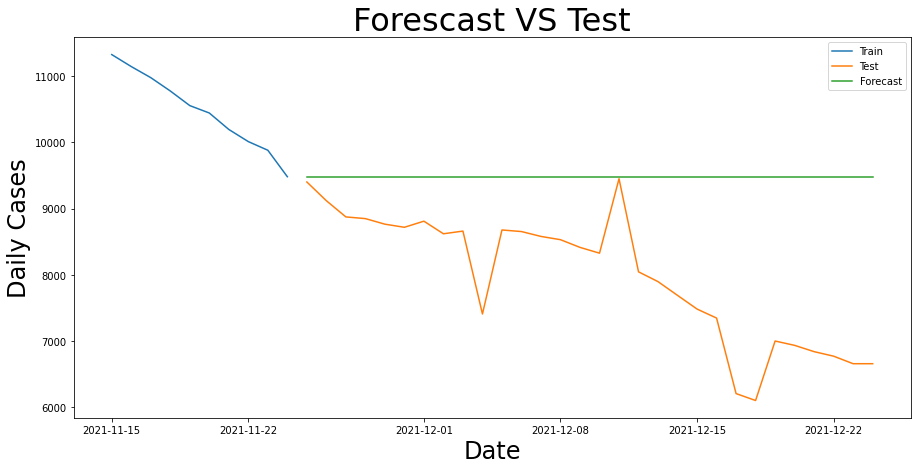

<Figure size 1080x504 with 0 Axes>

In [115]:
plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(fcst_ses_pred_df,label='Forecast')
plt.legend(loc="best")
plt.title("Forescast VS Test",size=32)
plt.xlabel("Date",size=24)
plt.ylabel("Daily Cases",size=24)
plt.show()
plt.savefig("SES foreast.png")

* We can clearly see that the **simple exponential smoothing** is not
performing well as the Covid 19 data, which will means our **hypothesis is wrong**.
* So we can conclude that our data can some type of trend and seasonality
* Our basic model was not be able to capture these details.

## Double Exponential Smoothing

* **Double Exponential Smoothing** is an extension to **Simple Exponential Smoothing** that explicity adds support for trends in the univariate time series

* In addition to the **alpha parameter** for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called **beta.**

* The method supports trends that change in different ways:
    * an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

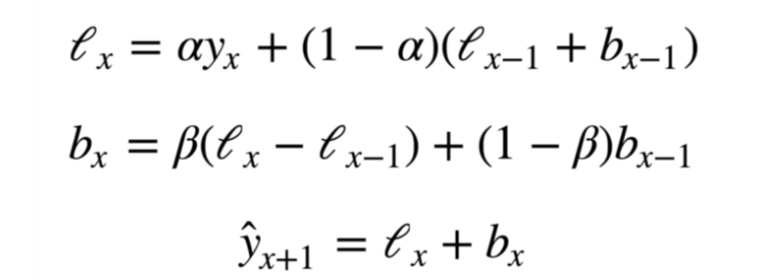

Here from the **formula** we have two components:
* **ℓ(level) :** intercept
* **b(slope) :** slope

* **The first function** one describes intercept,as it depends on the current value of the series, and the second term is now split into previous values of the level and of the trend.

* **The second function** describes trend as it depends on the level changes at the current step and on the pervious value of the trend.In this case β coefficient is a weight in the exponential smoothing.

* **The final prediction** is the sum of the model values of the intercept and the trend

So, from the above explanation we take our **hypothesis** as follows:

* We assume that our series has only **trend** and **no seasonality** component in it

### Double Exponential Smoothing algorithm's hyperparameters for reference:

* **Hyperparameters:**
    * **endog** (array-like): Time series
    * **exponential** (bool, optional): Type of trend
component

    * **damped_trend** (bool, optional): Whether the trend
component should be damped

*  About the **fit** parameters:
    * **smoothing_level** (float, optional): This is the **alpha**
value of the simple exponential smoothing. If the
value is set, then this setting will be used as the value.
    * **smoothing_trend** (float, optional): This is the **beta**
value of the Holt trend method. If the value is set,
then this setting will be used as the value.
    * **damping_trend** (float, optional): This is the **phi**
value of the damped method. If the value is set, then
this setting will be used as the value.
    * **Optimized** (bool, optional). This specifies whether
the values that have not been set be optimized
automatically.


In [116]:
param_grid = {
    'smoothing_level':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'smoothing_trend':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damping_trend':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damped_trend':[True,False]
}
pg = list(ParameterGrid(param_grid=param_grid))

Here in the **above code** we are defining a **range of parameters** for **smoothing_level,smoothing_trend,damping_trend** and **bool values** for the **damped_trend** and then are trying to find the best possible combination that yeilds least **RMSE and R2**

In [117]:
df_results_DES = pd.DataFrame(columns=['smoothing_level','smoothing_slope','damping_slope','damped','RMSE','r2'])

In [118]:
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_trend')
    damping_slope = b.get('damping_trend')
    damped = b.get('damped_trend')
    print(smoothing_level,smoothing_slope,damping_slope,damped)
    fit_o_f = Holt(train,damped_trend=damped).fit(smoothing_level=smoothing_level,
                                                  smoothing_trend=smoothing_slope,
                                                  damping_trend= damping_slope,
                                                  optimized=False)
    pred_o_f = fit_o_f.forecast(30)
    RMSE = np.sqrt(metrics.mean_squared_error(test,pred_o_f))
    r2 = metrics.r2_score(test,pred_o_f)
    print(f'RMSE is {RMSE}')
    df_results_DES = df_results_DES.append({
        'smoothing_level':smoothing_level,
        'smoothing_slope':smoothing_slope,
        'damping_slope':damping_slope,
        'damped':damped,
        'RMSE':RMSE,
        'r2':r2
    },ignore_index=True)
end = timer()
print("\n\n")
print(f'Total time taken to complete grid search in seconds: {(end-start)}')
print(f'Below mentioned parameter gives least RMSE and r2')
df_results_DES.sort_values(by=['RMSE','r2']).head(1)

0.1 0.1 0.1 True
RMSE is 3316.6192724321904
0.1 0.2 0.1 True
RMSE is 3296.819515016664
0.1 0.3 0.1 True
RMSE is 3277.580045081191
0.1 0.4 0.1 True
RMSE is 3258.877790715727
0.1 0.5 0.1 True
RMSE is 3240.6908252040475
0.1 0.6 0.1 True
RMSE is 3222.9983031122733
0.1 0.7 0.1 True
RMSE is 3205.780400271968
0.1 0.8 0.1 True
RMSE is 3189.0182573972725
0.1 0.9 0.1 True
RMSE is 3172.6939270958514
0.2 0.1 0.1 True
RMSE is 2521.856370440742
0.2 0.2 0.1 True
RMSE is 2513.56996595351
0.2 0.3 0.1 True
RMSE is 2505.449541305708
0.2 0.4 0.1 True
RMSE is 2497.4890828546504
0.2 0.5 0.1 True
RMSE is 2489.682886729154
0.2 0.6 0.1 True
RMSE is 2482.0255394892647
0.2 0.7 0.1 True
RMSE is 2474.5119001841335
0.2 0.8 0.1 True
RMSE is 2467.137083691922
0.2 0.9 0.1 True
RMSE is 2459.896445236388
0.3 0.1 0.1 True
RMSE is 2261.499373993263
0.3 0.2 0.1 True
RMSE is 2255.263351702996
0.3 0.3 0.1 True
RMSE is 2249.137736421656
0.3 0.4 0.1 True
RMSE is 2243.1194016213294
0.3 0.5 0.1 True
RMSE is 2237.205356631837
0.3

,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
732,0.1,0.4,0.1,False,505.342225,0.724218


In [119]:
print(f'Below mentioned parameter gives least RMSE and r2')
df_results_DES.sort_values(by=['RMSE','r2']).head(1)

Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
732,0.1,0.4,0.1,False,505.342225,0.724218


In [120]:
fit_des = Holt(train,damped_trend=False).fit(
    smoothing_level=0.1,
    smoothing_trend=0.4,
    damping_trend = 0.1,
    optimized=False
)
forecast_des_pred = fit_des.forecast(30)
fit_des.summary()

Dep. Variable:,confirmed,No. Observations:,633
Model:,Holt,SSE,45559342912.726
Optimized:,False,AIC,11460.116
Trend:,Additive,BIC,11477.918
Seasonal:,None,AICC,11460.251
Seasonal Periods:,None,Date:,"Tue, 28 Dec 2021"
Box-Cox:,False,Time:,14:08:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.4000000,beta,False


In [121]:
timseries_evaluation_metrics_func(test,forecast_des_pred)

Evaluation metric results:-
MSE is : 255370.764530166
MAE is : 354.9483340007498
RMSE is : 505.3422251605005
MAPE is : 4.538797066731462
R2 is : 0.7242181144073019



Allowing the Double Exponential smoothing to find the **optimal parameters**

* **optimized** = True estimates model parameters by
maximizing the log likelihood.
* **use_brute** = True searches for good starting values
using a brute-force (grid) optimizer.


In [122]:
fitDESAUTO = Holt(train).fit(optimized=True)
fitDESAUTO.summary()

C:\Users\amar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,confirmed,No. Observations:,633
Model:,Holt,SSE,367971910.766
Optimized:,True,AIC,8409.839
Trend:,Additive,BIC,8427.640
Seasonal:,None,AICC,8409.973
Seasonal Periods:,None,Date:,"Tue, 28 Dec 2021"
Box-Cox:,False,Time:,14:08:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242857,alpha,True
smoothing_trend,0.9242857,beta,True


In [123]:
fitDESAUTOpred = fitDESAUTO.forecast(30)
timseries_evaluation_metrics_func(test,fitDESAUTOpred)

Evaluation metric results:-
MSE is : 21546127.462232016
MAE is : 4020.1344949087406
RMSE is : 4641.780634867617
MAPE is : 53.87516848117412
R2 is : -22.268253394969378



### Summary of the Best Double Exponential Smoothing Model through Hyperparameters and Optimized model

* **fit_des** model through hyperparameters
* **fitDESAUTO** model through auto optimization 

In [124]:
forecast_des_pred_df = pd.DataFrame(forecast_des_pred)
forecast_des_pred_df["index"] = test.index
forecast_des_pred_df.set_index("index",inplace=True)
fitDESAUTOpred_df = pd.DataFrame(fitDESAUTOpred)
fitDESAUTOpred_df["index"] = test.index
fitDESAUTOpred_df.set_index("index",inplace=True)

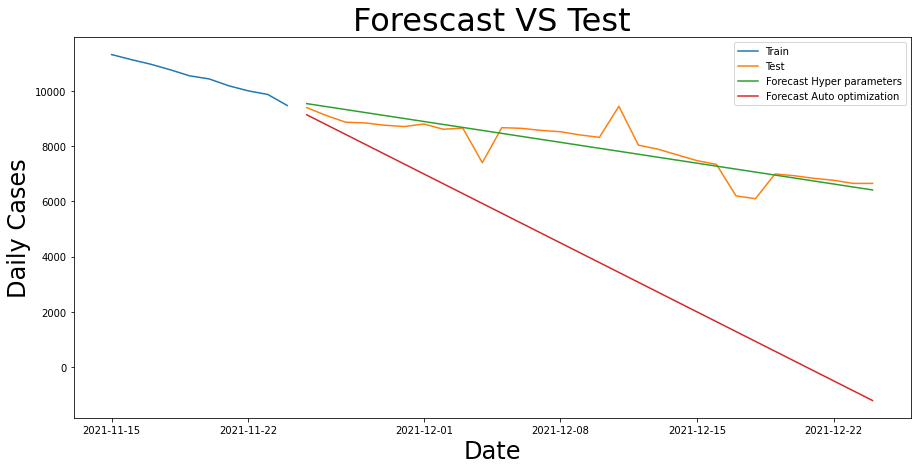

<Figure size 1080x504 with 0 Axes>

In [125]:
plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_des_pred_df,label='Forecast Hyper parameters')
plt.plot(fitDESAUTOpred_df,label='Forecast Auto optimization')
plt.legend(loc="best")
plt.title("Forescast VS Test",size=32)
plt.xlabel("Date",size=24)
plt.ylabel("Daily Cases",size=24)
plt.show()
plt.savefig("DES forecast.png")

* From the evaluation of metrics and graph, we can see that the **double exponential smoothing** performed **significantly better than the simple exponential smoothing**

* From the graph we can see both **hyperparameter model** and **auto model** both were able to follow the trend.

* We can clearly see that the **double exponential smoothing** is not
performing well as the Covid 19 data, which will means our **hypothesis is wrong**.

* So we can conclude that our data can have some type of seasonality

* Our basic model was not be able to capture these details.

## Triple Exponential Smoothing

* Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

* In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

* As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

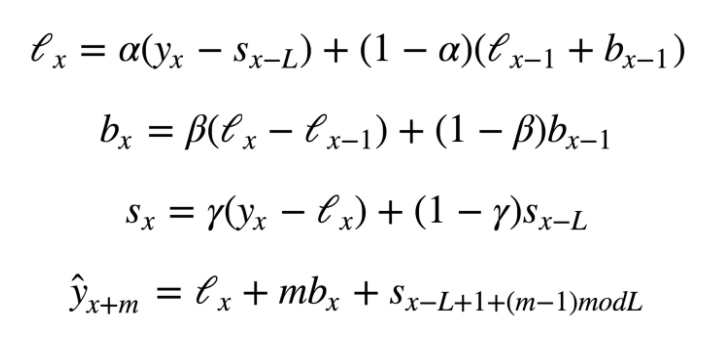

* **Intercept** now depends on the current value of the series minus corresponding seasonal component.
* **Trend** stays unchanged.
* **Seasonal** component depends on the current value of the series minus intercept and on the previous value of the component.

### Triple Exponential Smoothing algorithm's hyperparameters for reference:

* **Hyperparameters:**
    * **endog** (array-like): Time series
    * **trend** ({“add”, “mul”, “additive”, “multiplicative”,
None}, optional): Type of trend component
    * **damped_trend** (bool, optional): Whether the trend
component should be damped
    * **seasonal** ({“add”, “mul”, “additive”, “multiplicative”,
None}, optional): Type of seasonal component
    * **seasonal_periods** (int, optional): The number of
seasons to consider for Holt-Winters

*  About the **fit** parameters:
    
    * **smoothing_level** (float, optional): This is the **alpha**
value of the simple exponential smoothing. If the
value is set, then this setting will be used as the
value.
    * **smoothing_slope** (float, optional): This is the **beta**
value of the Holt trend method. If the value is set,
then this setting will be used as the value.
    * **smoothing_seasonal** (float, optional): This is the **gamma** value of the Holt-Winter seasonal method. If
the value is set, then this setting will be used as the
value.
    * **damping_slope** (float, optional): This is the **phi**
value of the damped method. If the value is set, then
this setting will be used as the value.
    * **optimized** (bool, optional): This specifies whether
the values that have not been set earlier should be
optimized automatically.


In [126]:
param_grid = {
    'trend':['add','mul'],
    'seasonal':['add','mul'],
    'seasonal_periods':[7,14],
    'smoothing_level':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'smoothing_slope':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damping_slope':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damped_trend':[True,False],
}
pg = list(ParameterGrid(param_grid=param_grid))


Here in the **above code** we are defining a **range of parameteric** values then we are trying to find the best possible combination that yeilds least **RMSE and R2**

In [127]:
"""
def model_func(train,test,b):
    trend = b.get("trend")
    seasonal = b.get("seasonal")
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level=b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped=b.get('damped')
    smoothing_seasonal = b.get('smoothing_seasonal')
    #use_boxcox = b.get('use_boxcox')
    #remove_bias = b.get('remove_bias')
    #use_basinhopping = b.get('use_basinhopping')
    RMSE,r2=0,0
    fitTES = ExponentialSmoothing(train,trend=trend,seasonal=seasonal,seasonal_periods=seasonal_periods,damped_trend=damped).fit(
        smoothing_level=smoothing_level,
        smoothing_slope=smoothing_slope,
        damping_slope=damping_slope,
        smoothing_seasonal = smoothing_seasonal,
        #use_boxcox=use_boxcox,
        optimized = False)
    fitTES_pred = fitTES.forecast(30)
    fitTES_pred.replace([np.inf,-np.inf],np.nan,inplace=True)
    fitTES_pred.dropna(inplace=True)
    if len(fitTES_pred) == len(test):    
        RMSE = np.sqrt(metrics.mean_squared_error(test,fitTES_pred))
        print(f'RMSE is {RMSE}')
        r2 = metrics.r2_score(test,fitTES_pred)
    else:
        RMSE = np.nan
        r2 = np.nan
    b['RMSE'] = RMSE
    b['r2'] = r2
    return b 
"""

'\ndef model_func(train,test,b):\n    trend = b.get("trend")\n    seasonal = b.get("seasonal")\n    seasonal_periods = b.get(\'seasonal_periods\')\n    smoothing_level=b.get(\'smoothing_level\')\n    smoothing_slope = b.get(\'smoothing_slope\')\n    damping_slope = b.get(\'damping_slope\')\n    damped=b.get(\'damped\')\n    smoothing_seasonal = b.get(\'smoothing_seasonal\')\n    #use_boxcox = b.get(\'use_boxcox\')\n    #remove_bias = b.get(\'remove_bias\')\n    #use_basinhopping = b.get(\'use_basinhopping\')\n    RMSE,r2=0,0\n    fitTES = ExponentialSmoothing(train,trend=trend,seasonal=seasonal,seasonal_periods=seasonal_periods,damped_trend=damped).fit(\n        smoothing_level=smoothing_level,\n        smoothing_slope=smoothing_slope,\n        damping_slope=damping_slope,\n        smoothing_seasonal = smoothing_seasonal,\n        #use_boxcox=use_boxcox,\n        optimized = False)\n    fitTES_pred = fitTES.forecast(30)\n    fitTES_pred.replace([np.inf,-np.inf],np.nan,inplace=True)\n  

* This the model function it returns **model parameters** and its **RMSE** and **R2** values

In [128]:
"""
start = timer()
rest = []

with multiprocessing.Pool(processes=10) as pool:
    results = [pool.apply_async(model_func,args=(train,test,b)) for _,b in enumerate(pg)]
    
    for r in results:
        rest.append(r.get())
    #for a,b in enumerate(pg):
        #results.append(model_func(train,test,b))
end = timer()
print(f'Total time taken : {(end-start)}')
print(len(rest))
df_results_TES = pd.DataFrame(columns=['trend','seasonal','damped','seasonal_periods','smoothing_level',
                                       'smoothing_slope','smoothing_seasonal','damping_slope',
                                       'RMSE','r2'
                                       ])

for r in rest:
    count = count+1
    print(count)
    df_results_TES = df_results_TES.append(r,ignore_index=True)
df_results_TES.to_csv('model_parameters6.csv')

"""

"\nstart = timer()\nrest = []\n\nwith multiprocessing.Pool(processes=10) as pool:\n    results = [pool.apply_async(model_func,args=(train,test,b)) for _,b in enumerate(pg)]\n    \n    for r in results:\n        rest.append(r.get())\n    #for a,b in enumerate(pg):\n        #results.append(model_func(train,test,b))\nend = timer()\nprint(f'Total time taken : {(end-start)}')\nprint(len(rest))\ndf_results_TES = pd.DataFrame(columns=['trend','seasonal','damped','seasonal_periods','smoothing_level',\n                                       'smoothing_slope','smoothing_seasonal','damping_slope',\n                                       'RMSE','r2'\n                                       ])\n\nfor r in rest:\n    count = count+1\n    print(count)\n    df_results_TES = df_results_TES.append(r,ignore_index=True)\ndf_results_TES.to_csv('model_parameters6.csv')\n\n"

* This the code for implementing using **multi processing** and storing results in a **data frame** and converting the **data frame** into a **csv file**

* The full code is present tripleExpoSmoothing.py for multiprocessing  

#### Getting Model Parameters Data

In [129]:
parameter_df = pd.read_csv("TESparameters.csv",sep=",")
parameter_df.head()

,index,trend,seasonal,damped,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,RMSE,r2
0,0,add,add,True,7,0.1,0.1,0.1,0.1,3059.695428,-9.109995
1,1,mul,add,True,7,0.1,0.1,0.1,0.1,3059.907271,-9.111395
2,2,add,add,True,7,0.1,0.2,0.1,0.1,3046.259466,-9.021399
3,3,mul,add,True,7,0.1,0.2,0.1,0.1,3046.650684,-9.023973
4,4,add,add,True,7,0.1,0.3,0.1,0.1,3033.137541,-8.935249


In [130]:
parameter_df.set_index('index',inplace=True)
parameter_df

,trend,seasonal,damped,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,RMSE,r2
index,,,,,,,,,,
0,add,add,True,7,0.1,0.1,0.1,0.1,3059.695428,-9.109995
1,mul,add,True,7,0.1,0.1,0.1,0.1,3059.907271,-9.111395
2,add,add,True,7,0.1,0.2,0.1,0.1,3046.259466,-9.021399
3,mul,add,True,7,0.1,0.2,0.1,0.1,3046.650684,-9.023973
4,add,add,True,7,0.1,0.3,0.1,0.1,3033.137541,-8.935249
...,...,...,...,...,...,...,...,...,...,...
104971,mul,mul,False,14,0.9,0.7,0.9,0.9,NaN,NaN
104972,add,mul,False,14,0.9,0.8,0.9,0.9,123243.921913,-16402.086695
104973,mul,mul,False,14,0.9,0.8,0.9,0.9,NaN,NaN


In [131]:
parameter_df.shape

(104976, 10)

In [132]:
parameter_df.isna().sum()

trend                    0
seasonal                 0
damped                   0
seasonal_periods         0
smoothing_level          0
smoothing_slope          0
smoothing_seasonal       0
damping_slope            0
RMSE                  6788
r2                    6788
dtype: int64

In [133]:
parameter_df.dropna(inplace=True)

Droping **Nan** value rows from the **dataframe**

In [134]:
parameter_df.isna().sum()

trend                 0
seasonal              0
damped                0
seasonal_periods      0
smoothing_level       0
smoothing_slope       0
smoothing_seasonal    0
damping_slope         0
RMSE                  0
r2                    0
dtype: int64

In [135]:
parameter_df.shape

(98188, 10)

In [136]:
parameter_df.sort_values(by=['RMSE','r2']).head(10)

,trend,seasonal,damped,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,RMSE,r2
index,,,,,,,,,,
52738,add,add,False,7,0.2,0.9,0.5,0.1,518.401362,0.709780
58570,add,add,False,7,0.2,0.9,0.5,0.2,518.401362,0.709780
64402,add,add,False,7,0.2,0.9,0.5,0.3,518.401362,0.709780
70234,add,add,False,7,0.2,0.9,0.5,0.4,518.401362,0.709780
76066,add,add,False,7,0.2,0.9,0.5,0.5,518.401362,0.709780
81898,add,add,False,7,0.2,0.9,0.5,0.6,518.401362,0.709780
87730,add,add,False,7,0.2,0.9,0.5,0.7,518.401362,0.709780
93562,add,add,False,7,0.2,0.9,0.5,0.8,518.401362,0.709780
99394,add,add,False,7,0.2,0.9,0.5,0.9,518.401362,0.709780


#### Best Best Triple Exponential Smoothing Model through Hyperparameters and Summary

In [137]:
fit1 = ExponentialSmoothing(train,trend="add",seasonal="add",damped_trend=False,
                            seasonal_periods=7).fit(
                                smoothing_level=0.2,
                                smoothing_trend=0.9,
                                smoothing_seasonal=0.5,
                                damping_trend=0.1,
                                optimized = False
                            )

In [138]:
forecast_custom_pred1 = fit1.forecast(30)
fit1.summary()

Dep. Variable:,confirmed,No. Observations:,633
Model:,ExponentialSmoothing,SSE,4171044004.973
Optimized:,False,AIC,9960.709
Trend:,Additive,BIC,10009.664
Seasonal:,Additive,AICC,9961.297
Seasonal Periods:,7,Date:,"Tue, 28 Dec 2021"
Box-Cox:,False,Time:,14:08:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.9000000,beta,False


In [139]:
timseries_evaluation_metrics_func(test,forecast_custom_pred1)

Evaluation metric results:-
MSE is : 268739.9722047286
MAE is : 354.4880190179484
RMSE is : 518.4013620783886
MAPE is : 4.585372778701931
R2 is : 0.7097803407327993



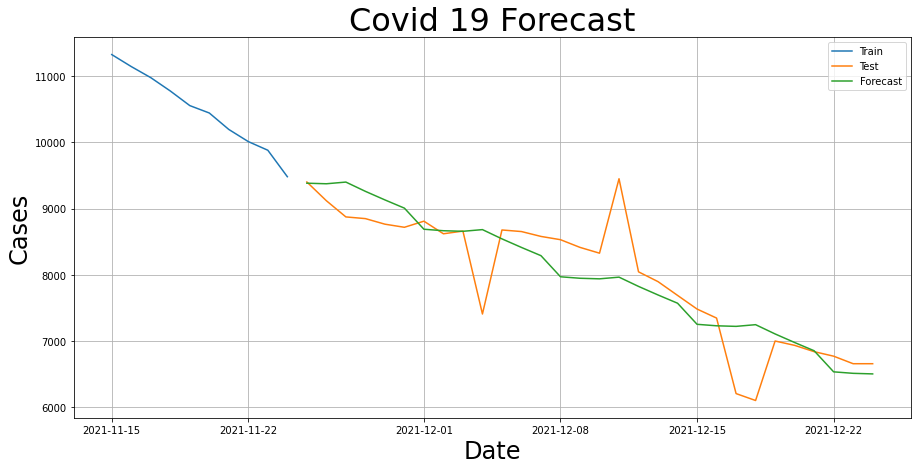

<Figure size 1080x504 with 0 Axes>

In [141]:
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_custom_pred1,label='Forecast')
plt.title("Covid 19 Forecast",size=32)
plt.xlabel("Date",size=24)
plt.ylabel("Cases",size=24)
plt.legend(loc="best")
plt.grid(True)
plt.show()
plt.savefig("TES forecast.png",dpi =200)

# Showman norm

In [1]:
import pandas as pd

In [2]:
senti = pd.read_csv("prev_ts_data.csv",parse_dates=True,index_col='date')
senti

,sscore
date,
2021-11-01,0.60
2021-11-02,-0.80
2021-11-03,-0.80
2021-11-04,0.60
2021-11-05,-1.00
2021-11-06,-0.80
2021-11-07,-0.80
2021-11-08,-0.80
2021-11-09,-0.80


In [5]:
roll_ssenti = senti.rolling(window=7,min_periods=1).mean()

In [6]:
roll_ssenti

,sscore
date,
2021-11-01,6.000000e-01
2021-11-02,-1.000000e-01
2021-11-03,-3.333333e-01
2021-11-04,-1.000000e-01
2021-11-05,-2.800000e-01
2021-11-06,-3.666667e-01
2021-11-07,-4.285714e-01
2021-11-08,-6.285714e-01
2021-11-09,-6.285714e-01
